In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
hr = pd.read_csv("/Users/dominicventura/Machine Learning/Neural Network Project/hremployee.csv")

In [3]:
hr.drop(['EmployeeCount', 
         'EmployeeNumber', 
         'Over18', 
         'StandardHours'], axis=1, inplace=True)


In [4]:
hr.shape

(1470, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b50eba8>,
      dtype=object)

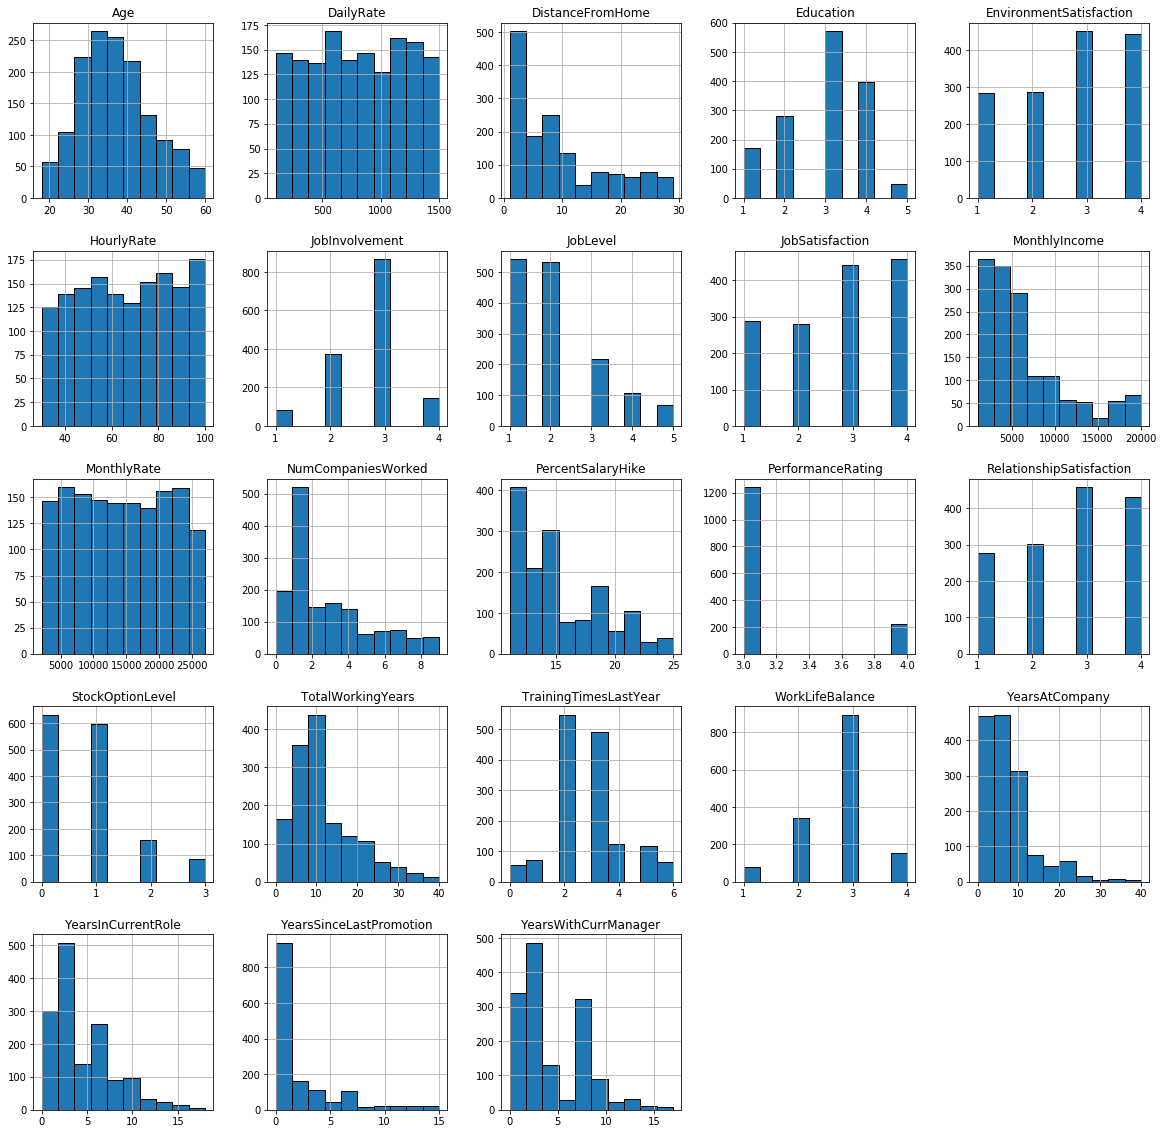

In [5]:
hr.hist(edgecolor = "black", linewidth = 1, figsize=(20,20))

In [6]:
cat_cols = []
for column in hr.columns:
    if hr[column].dtype == object and len(hr[column].unique()) <= 30:
        cat_cols.append(column)
        print(f"{column} : {hr[column].unique()}")
        print(hr[column].value_counts())
        print("====================================")
cat_cols.remove('Attrition')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

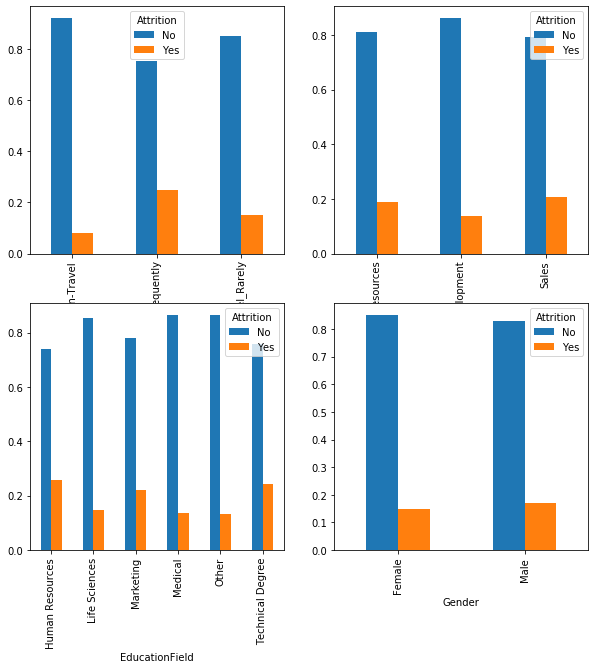

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

props = hr.groupby("BusinessTravel")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,0])

props = hr.groupby("Department")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,1])

props = hr.groupby("EducationField")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,0])

props = hr.groupby("Gender")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,1])


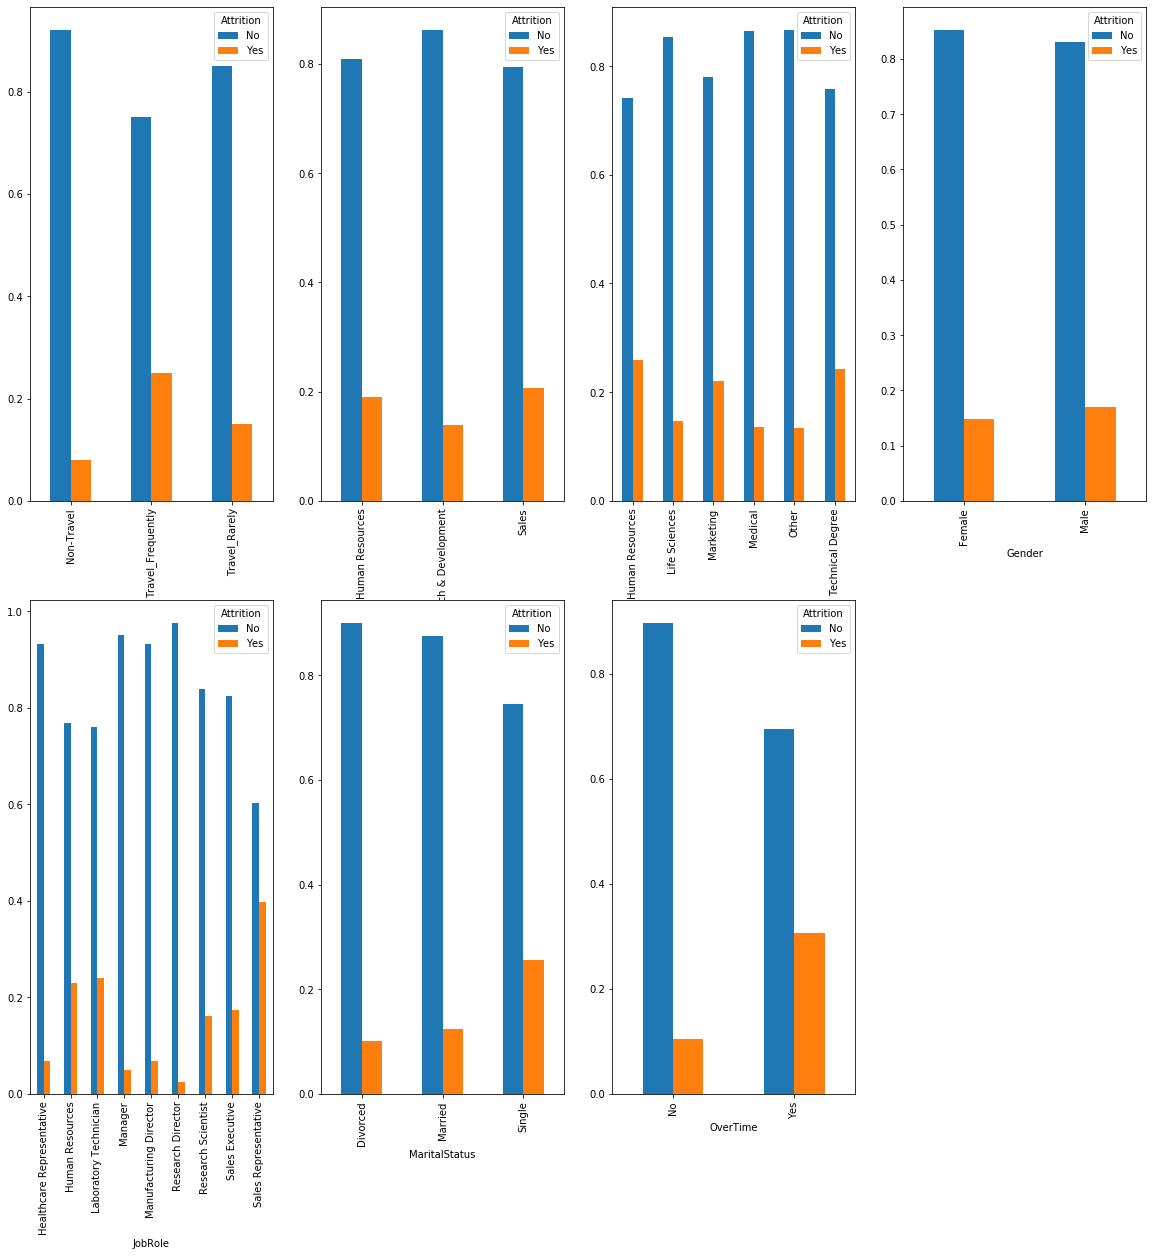

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,20))

props = hr.groupby("BusinessTravel")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,0])

props = hr.groupby("Department")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,1])

props = hr.groupby("EducationField")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,2])

props = hr.groupby("Gender")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,3])

props = hr.groupby("JobRole")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,0])

props = hr.groupby("MaritalStatus")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,1])

props = hr.groupby("OverTime")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,2])


fig.delaxes(axes[1][3])


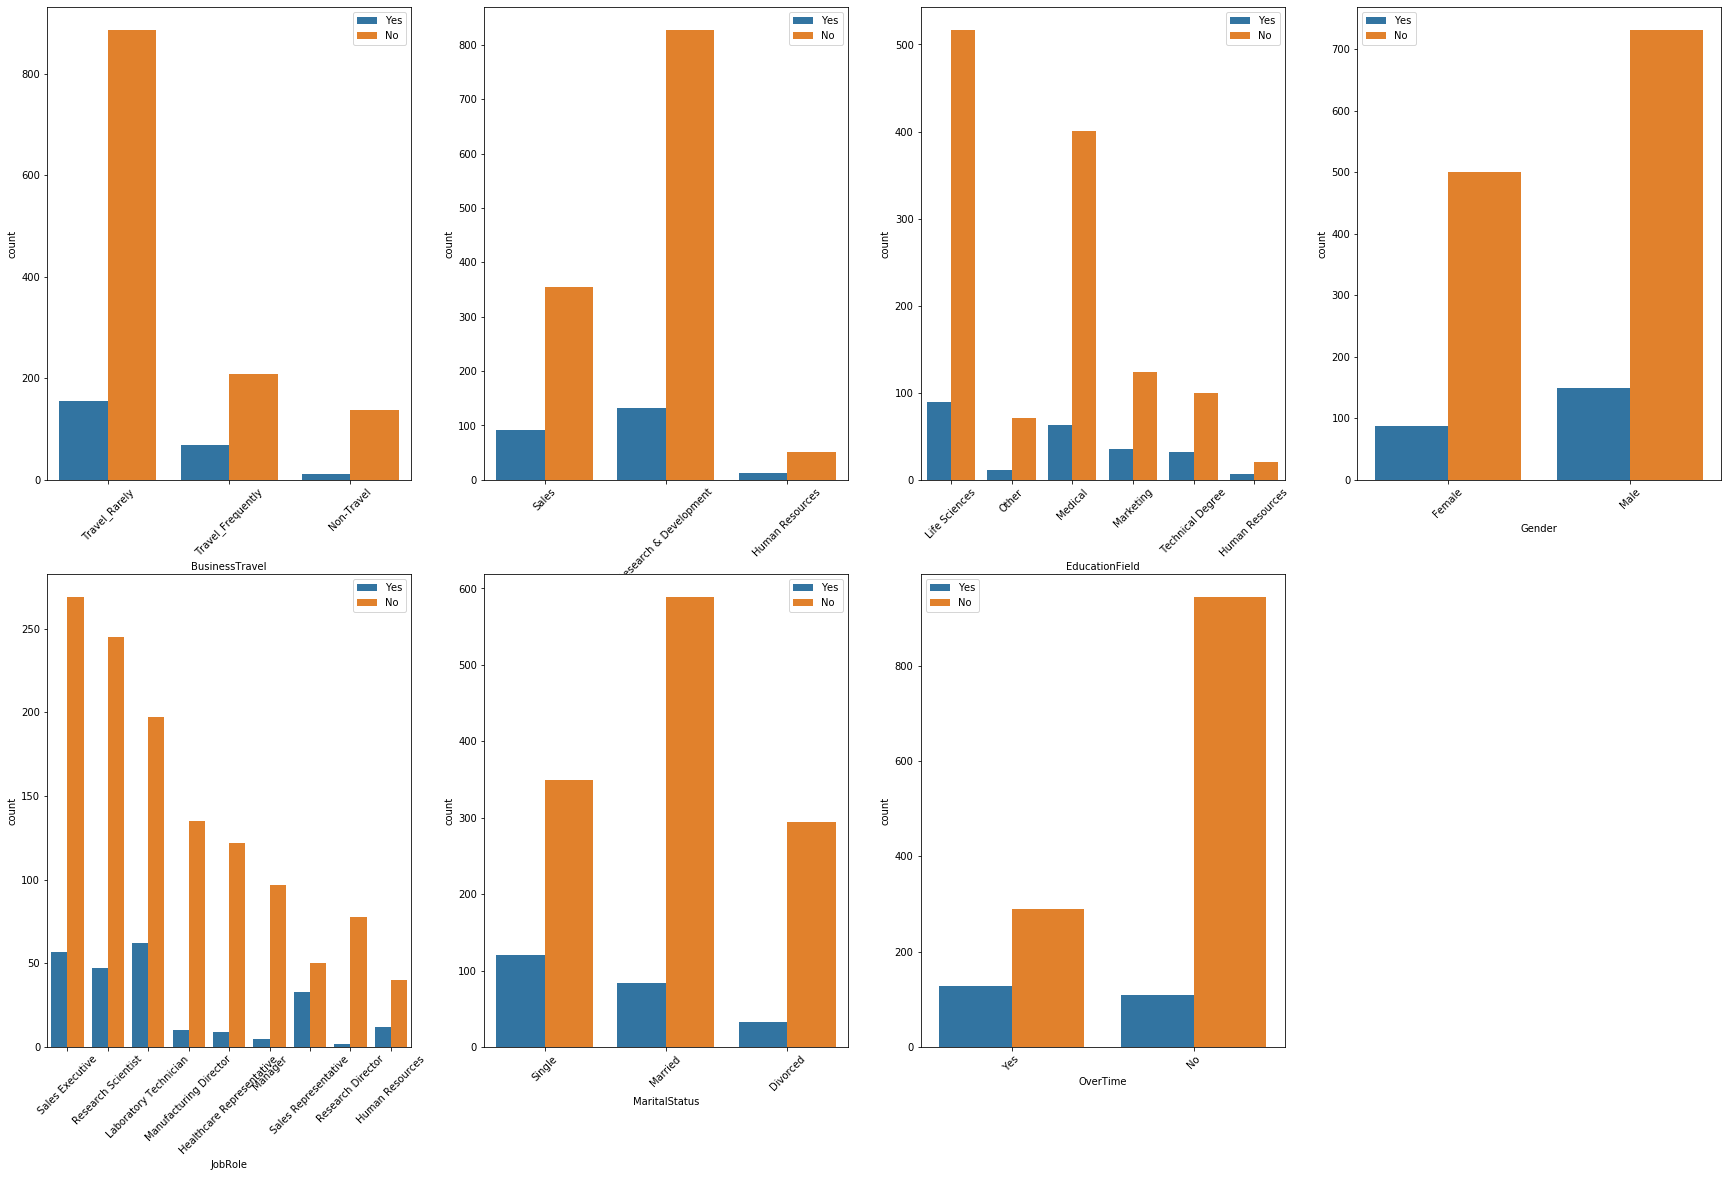

In [9]:
plt.figure(figsize=(30,40))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(4,4,i)
    chart = sns.countplot(x=column, hue = "Attrition", data=hr)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
    plt.legend()
    plt.xlabel(column)

Business Travel: People who traveled frequently were more likely to leave, but those who rarely traveled were more likely to leave.

Department: If you worked in the Research & Development Department, you were less likely to leave your job.

Educational Field: Workers with degrees involved with HR, Technical, and Marketing were more likely to quit than the others.

Gender: Men were more likely to leave their job than women.

Job Role: Sales Representative, Lab Technician, and Human Resources were more likely to leave their job. 

Marital Status: Single people were more likely to leave their job.

Over Time: Those that worked more hours were more likely to leave.

In [10]:
print(pd.crosstab(columns = [hr.Attrition], index = [hr.BusinessTravel], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [hr.Attrition], index = [hr.Department], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [hr.Attrition], index = [hr.EducationField], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [hr.Attrition], index = [hr.Gender], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [hr.Attrition], index = [hr.JobRole], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [hr.Attrition], index = [hr.MaritalStatus], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [hr.Attrition], index = [hr.OverTime], margins = True, normalize = 'index'))

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569
All                0.838776  0.161224
Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278
All                     0.838776  0.161224
Attrition               No       Yes
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424
All               0.838776  0.161224
Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068
All        0.838776  0.161224
Attrition                      

In [11]:
label = LabelEncoder()
hr["Attrition"] = label.fit_transform(hr.Attrition)

In [12]:
discrete_cols = []
for column in hr.columns:
    if hr[column].dtype != object and hr[column].nunique() < 30 :
        print(f"{column} : {hr[column].nunique()}") # number of unqiue values for each numerical column
        discrete_cols.append(column)
        print("====================================================")

discrete_cols.remove('Attrition')

Attrition : 2
DistanceFromHome : 29
Education : 5
EnvironmentSatisfaction : 4
JobInvolvement : 4
JobLevel : 5
JobSatisfaction : 4
NumCompaniesWorked : 10
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StockOptionLevel : 4
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [13]:
continuous = []
for column in hr.columns:
    if column != object and hr[column].nunique() > 30:
        print(f"{column}: Min: {hr[column].min()}, Max: {hr[column].max()}")
        continuous.append(column)
        print("====================================================")


Age: Min: 18, Max: 60
DailyRate: Min: 102, Max: 1499
HourlyRate: Min: 30, Max: 100
MonthlyIncome: Min: 1009, Max: 19999
MonthlyRate: Min: 2094, Max: 26999
TotalWorkingYears: Min: 0, Max: 40
YearsAtCompany: Min: 0, Max: 40


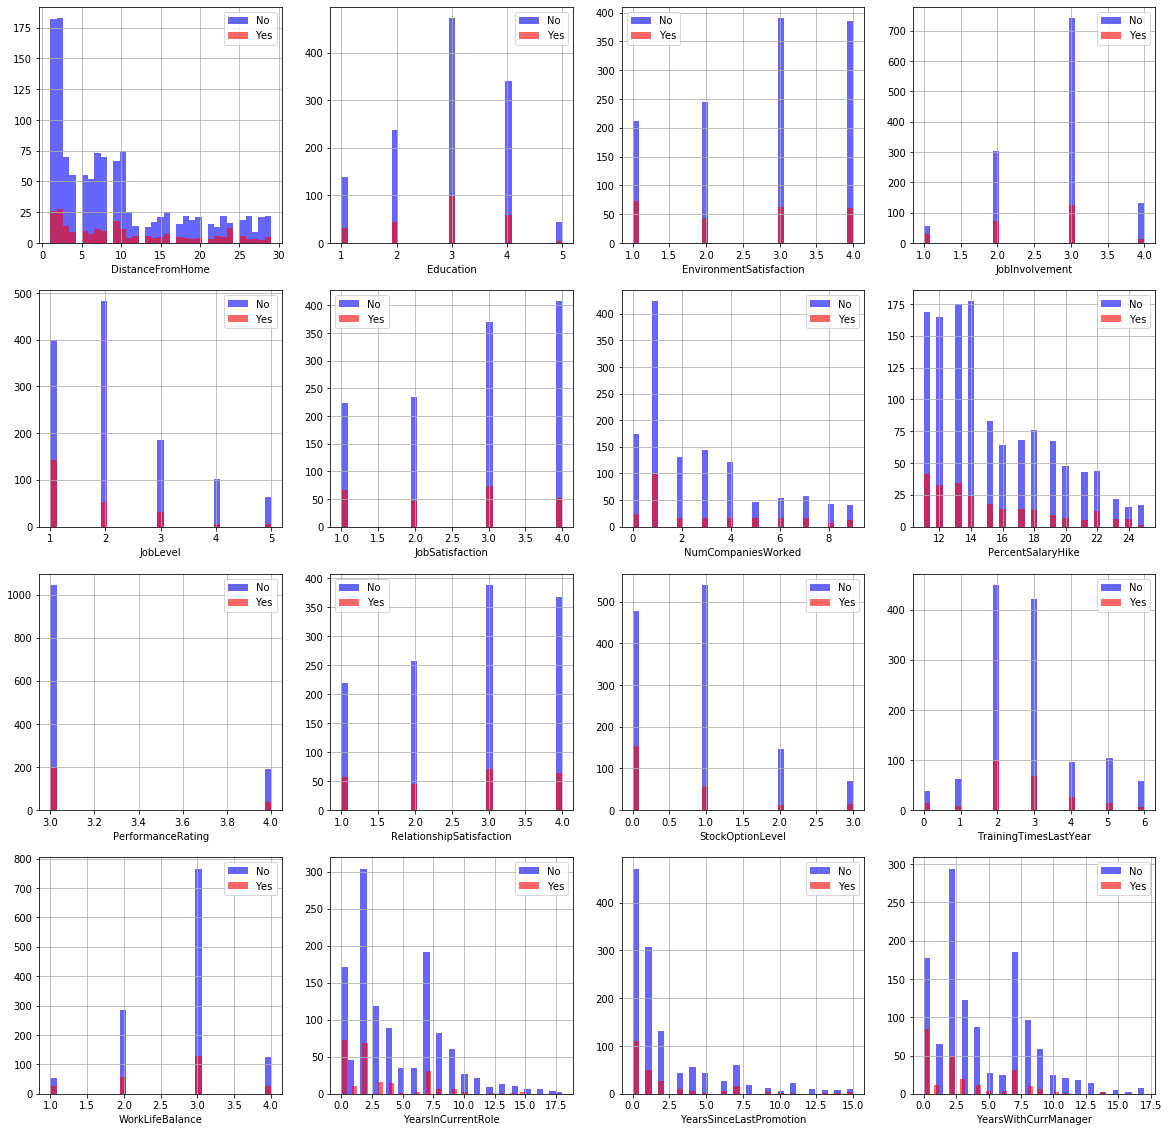

In [14]:
plt.figure(figsize=(20,20))

for i, column in enumerate(discrete_cols, 1):
    plt.subplot(4,4,i)
    hr[hr["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "No", alpha = 0.6)
    hr[hr["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Yes", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

    

Factors like Job Satisfaction, Environment Satisfaction, and Distance From Home didn't play as much of a role in people leaving their jobs as much I thought they would. Although, Job Level shows a lot of people with a low job level were more likely to quit. 

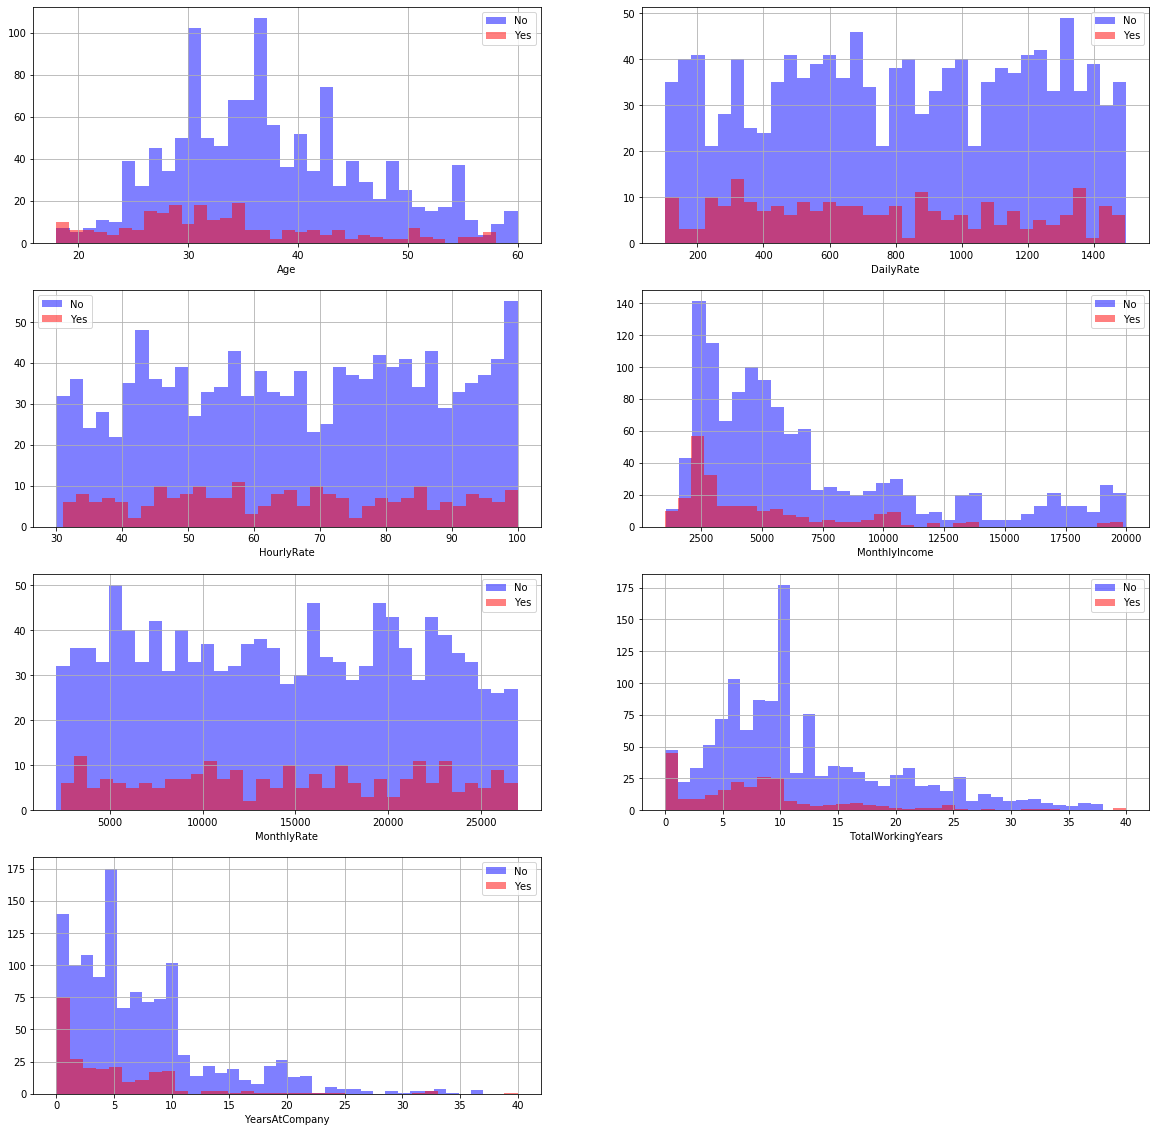

In [15]:
plt.figure(figsize=(20,20))

for i, column in enumerate(continuous, 1):
    plt.subplot(4,2,i)
    hr[hr["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "No", alpha = 0.5)
    hr[hr["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Yes", alpha = 0.5)
    plt.legend()
    plt.xlabel(column)

These histograms show us workers with lower Years At Company, Monthly Income, and Total Working Years were more likely to leave.

In [16]:
sr = hr[hr['JobRole'] == "Sales Representative"]

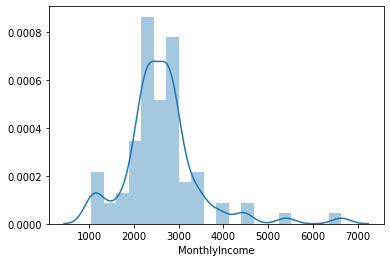

In [17]:
sns.distplot(sr["MonthlyIncome"])


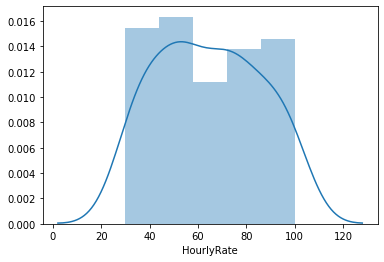

In [18]:
sns.distplot(sr["HourlyRate"])


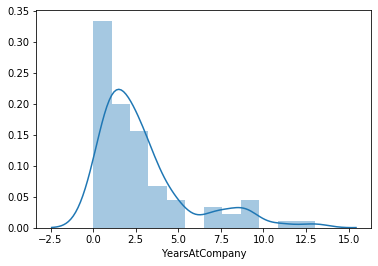

In [19]:
sns.distplot(sr["YearsAtCompany"])
